# About this notebook

Here, we will demonstrate how to use the code in TremaineWeinberg.py, using the strongly barred example shown in [Géron et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023MNRAS.521.1775G/abstract). We will reproduce Figures 2, 3, 4 and 5 from the paper.

# Imports

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# MaNGA-related imports and settings
from marvin.tools.maps import Maps
from marvin import config
config.setRelease('DR17')

# Import TW code
from TremaineWeinberg import Tremaine_Weinberg

[INFO]: No release version set. Setting default to DR17
[WARNING]: /Users/tobias/miniconda3/envs/astro/lib/python3.12/site-packages/marvin/tools/mixins/aperture.py:26: DeprecationWarning: `photutils.Aperture` is a deprecated alias for `photutils.aperture.Aperture` and will be removed in the future. Instead, please use `from photutils.aperture import Aperture` to silence this warning.
  class MarvinAperture(photutils.Aperture if photutils else object):



# Code

In [2]:
# Retrieve data for target.
# We need the inclination, PA of the disc, bar length and PA of the bar.

plateifu = '11956-12702' #Strongly barred example from paper

maps = Maps(plateifu = plateifu, bintype='VOR10')

df_inputs = pd.read_csv('tables_geron2023/Table1.csv')
i = np.where(df_inputs['PLATEIFU'] == plateifu)[0][0]

# inclination
inc = df_inputs['inc'][i]
inc_err = df_inputs['inc_err'][i]

# Position angle galaxy
PA = df_inputs['PA'][i]
PA_err = df_inputs['PA_err'][i]

# Length of the bar
L_bar = df_inputs['R_bar'][i] * 2 
L_bar_err = df_inputs['R_bar_err'][i] * 2

# Position angle of the bar
PA_bar = df_inputs['PA_bar'][i]
PA_bar_err = df_inputs['PA_bar_err'][i]


print(f'Galaxy plateifu: {plateifu}\n')
print(f'Inclination: {np.round(inc,2)}+-{np.round(inc_err,2)} deg')
print(f'Position angle: {np.round(PA,2)}+-{np.round(PA_err,2)} deg')
print(f'Bar length: {np.round(L_bar,2)}+-{np.round(L_bar_err,2)} arcsec')
print(f'Position angle of the bar: {np.round(PA_bar,2)}+-{np.round(PA_bar_err,2)} deg')

Galaxy plateifu: 11956-12702

Inclination: 60.81+-1.05 deg
Position angle: 53.0+-0.55 deg
Bar length: 26.93+-0.97 arcsec
Position angle of the bar: 75.56+-0.09 deg


In [3]:
# Perform TW method
# For most accurate estimates, do n_iter >= 1000. I keep it at n_iter = 0 here for performance reasons.

start_time = time.time()

tw = Tremaine_Weinberg(PA, inc, L_bar, PA_bar, maps, PA_err = PA_err, inc_err = inc_err,
                       barlen_err = L_bar_err, PA_bar_err = PA_bar_err,
                      n_iter = 0, min_slit_length = 0)

print(f'{np.round(time.time() - start_time,2)} seconds elapsed.')

[WARNING]: /Users/tobias/miniconda3/envs/astro/lib/python3.12/site-packages/marvin/tools/quantities/map.py:458: RuntimeWarning: divide by zero encountered in divide
  '*': lambda ivar, c: ivar / c**2, '/': lambda ivar, c: ivar * c**2}



5.09 seconds elapsed.


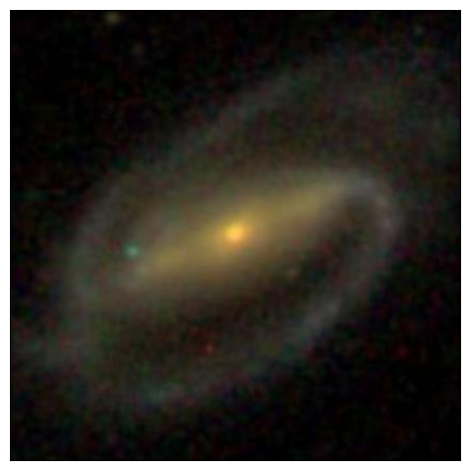

In [4]:
# You can look at the galaxy by doing (image is from SDSS, obtained through Marvin)
tw.plot_img()

[WARNING]: /Users/tobias/miniconda3/envs/astro/lib/python3.12/site-packages/marvin/utils/plot/colorbar.py:351: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cm_name)



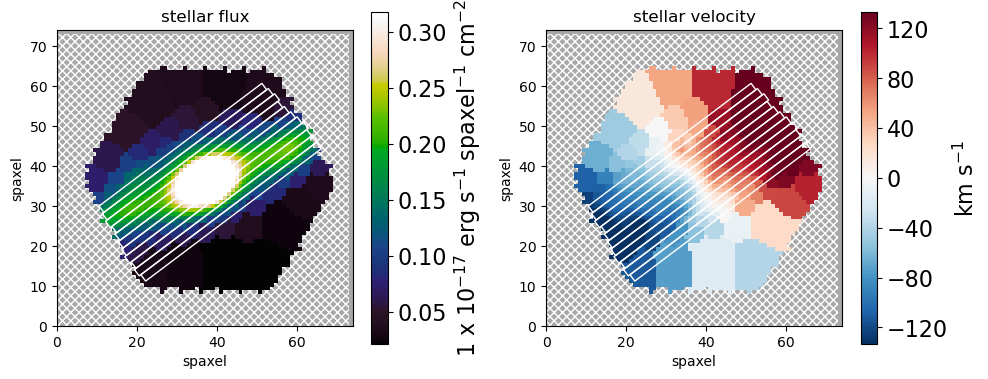

In [5]:
# You can plot various maps, similar to Figure 2 in Géron et al. (2023) by doing:

tw.plot_maps(plot_apers = True) # The plot_apers parameter plots the apertures used on top of the maps.  


# By default it plots the stellar flux and stellar velocity together. But you can also plot X_Sigma and V_Sigma.
# This can be done by doing:
# tw.plot_maps(maps = ['stellar_flux','stellar_vel','X_Sigma','V_Sigma'])


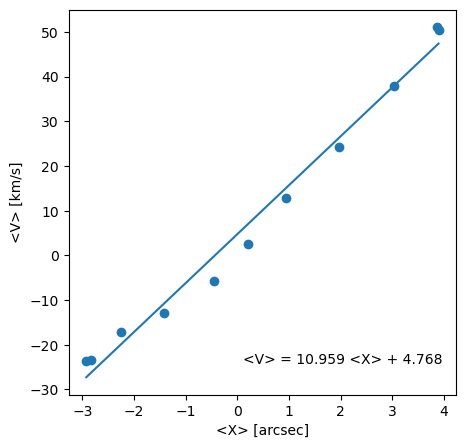

The NRMSE on this fit is: 0.0436


(10.958753870070188, 4.768221867924241)

In [6]:
# You can also check whether the different slits agree with each other, by inspecting the <X> vs <V> plot.
# This is similar to Figure 3 in Géron et al. (2023)

tw.plot_X_V()

# You can access the NRMSE on this fit by doing:
print(f'The NRMSE on this fit is: {np.round(tw.NRMSE_X_V,4)}')


tw.fitted_line[0][0], tw.fitted_line[0][1]

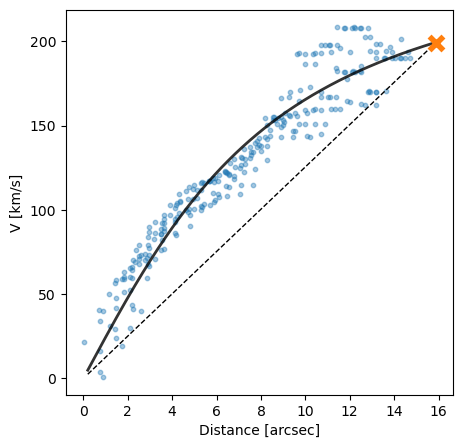

In [7]:
# One can also visualise how to corotation radius (Rcr) is obtained by plotting the velocity curve,
# which is similar to Figure 4 in Géron et al. (2023):

tw.plot_V_curve()

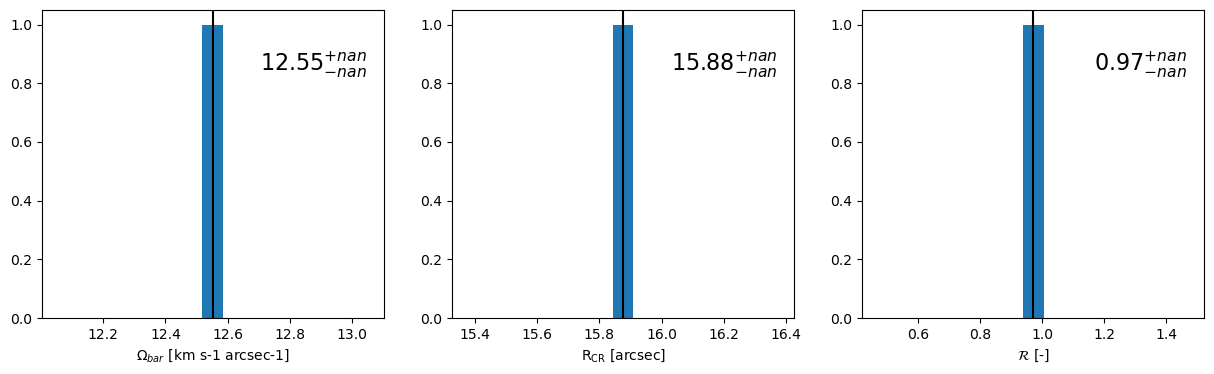

In [8]:
# Finally, one can see the final histograms of the bar pattern speed, corotation radius and curly R,
# as shown in Figure 5 of Géron et al. (2023), by doing:

tw.plot_hist_MC(variables = ['Omega','R_corot','R'])

# the +-nan appears here because n_iter = 0. If >0, it will show the +-1sigma errors.

In [9]:
# You can directly access the bar pattern speed, corotation radius and curly R values like this:

Omega = tw.Omega
Rcr = tw.R_corot
R = tw.R

print(f'For target with plateifu {plateifu}, we obtain:')
print(f'Omega = {np.round(Omega,2)} km s-1 arcsec-1')
print(f'Rcr = {np.round(Rcr,2)} arcsec')
print(f'R = {np.round(R,2)}')

For target with plateifu 11956-12702, we obtain:
Omega = 12.55 km s-1 arcsec-1
Rcr = 15.88 arcsec
R = 0.97


In [10]:
# Compare with results from paper

df_results = pd.read_csv('tables_geron2023/Table3.csv')
i = np.where(df_results['PLATEIFU'] == plateifu)[0][0]

Omega_paper = df_results['Omega'][i]
Rcr_paper = df_results['Rcr'][i]
R_paper = df_results['R'][i]

print(Omega, Omega_paper,np.abs(Omega - Omega_paper))
print(Rcr, Rcr_paper,np.abs(Rcr - Rcr_paper))
print(R, R_paper,np.abs(R - R_paper))

12.552329670164978 12.368417887374122 0.1839117827908563
15.87633033137579 16.20240497821937 0.3260746468435798
0.9719136387794902 1.0008575256272882 0.028943886847798028


[WARNING]: /Users/tobias/miniconda3/envs/astro/lib/python3.12/site-packages/marvin/utils/plot/colorbar.py:351: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cm_name)



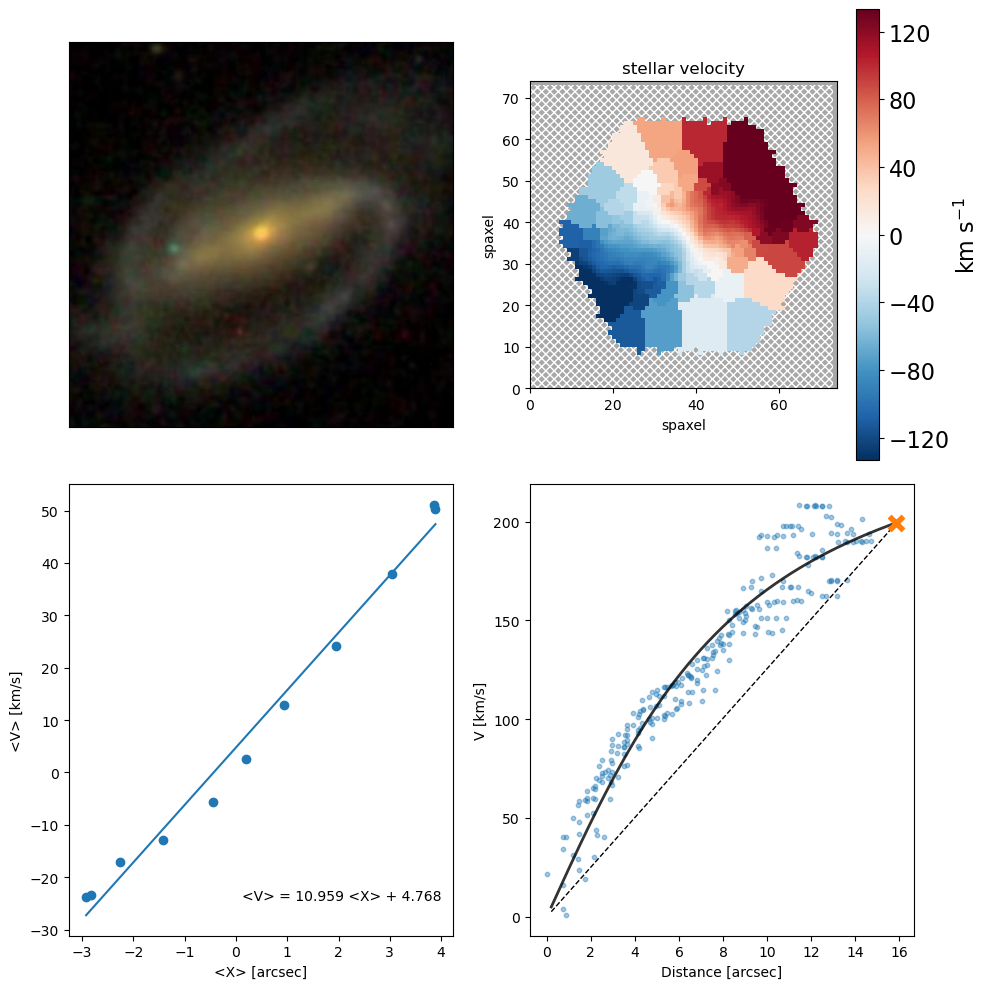

In [11]:
# You can combine these figures by adding the argument standalone = False
# For example:

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
tw.plot_img(standalone=False)

plt.subplot(2,2,2)
tw.plot_maps(maps=['stellar_vel'], standalone = False)

plt.subplot(2,2,3)
tw.plot_X_V(standalone=False)

plt.subplot(2,2,4)
tw.plot_V_curve(standalone=False)

plt.tight_layout()
plt.show()

In [12]:
# TODO: Show version where NRMSE is too high, or not enough iterations successfull etc. 